# Inheriting all the codes from the Main.ipynb

### Mounting

In [ ]:
import os

TARGET_PATH = '/content/drive/MyDrive/HTTTTM-2/Final Term';
CURRENT_DIR = os.path.abspath(os.curdir)

print('Current dir:', CURRENT_DIR)

if TARGET_PATH != CURRENT_DIR:
  os.chdir(TARGET_PATH)


print('\nContaining:\n')
print('\n'.join(os.listdir()))

Current dir: /content

Containing:

images
dataset
ImageCrawler.ipynb
FeatureExtractor.ipynb
CNN
Logistic Regression
Main.ipynb


### Import all the codes from the Main.ipynb

In [ ]:
%run Main.ipynb



Training data: (697932, 784) float32 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Testing data: (116323, 784) float32 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Tranining classes (697932, 1) uint8 
 [[35]
 [36]
 [ 6]
 ...
 [ 5]
 [11]
 [22]]

Testing classes (116323, 1) uint8 
 [[18]
 [36]
 [ 0]
 ...
 [28]
 [ 0]
 [ 5]]
time: 15.7 s (started: 2021-07-18 19:06:36 +00:00)


# Model building

## Trasforming the labels to categorical-vector for each feature

In [ ]:
from keras.utils import np_utils

# transforming each label to a categorycal vector
train_labels = np_utils.to_categorical(base_y_train, 62)
test_labels = np_utils.to_categorical(base_y_test, 62)


print(base_y_train)
print(train_labels)

print()
print(base_y_test)
print(test_labels)

[[35]
 [36]
 [ 6]
 ...
 [ 5]
 [11]
 [22]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

[[18]
 [36]
 [ 0]
 ...
 [28]
 [ 0]
 [ 5]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
time: 1.52 s (started: 2021-07-18 19:07:27 +00:00)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers, applications
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.constraints import MaxNorm

time: 2.85 ms (started: 2021-07-18 19:07:32 +00:00)


In [ ]:
# start
K.set_learning_phase(1)


# allowing to add multiple layers
# https://keras.io/guides/sequential_model/
model = Sequential()


# reshaping the input (data/features) to (28, 28, 1)
# https://keras.io/api/layers/reshaping_layers/reshape/
model.add( Reshape((28,28,1), input_shape=(784,)) )


# Convolution2D(filters: int, kernel_size: )
# tích chập với ma trận đầu vào là ảnh 28×28 pixel (aka 28×28 array)
# Convolution là phép tích chập, phép toán cốt lõi tạo nên hiệu quả của các mạng CNN.

# the activation='relu' means "the output of this layer" will be passed to the 'relu', before become input of the next layer
# relu is equals to: f(x)=max(0, x) (x: feature) | means if the feature is negative, it will be 0 | otherwise it will be it self
model.add(Convolution2D(32, (5,5), activation='relu'))


# reducing array dimensions but still keep the main/important features
# một kỹ thuật trong mạng CNN dùng để trích ra những đặc trưng có tín hiệu lớn nhất trong một vùng lân cận.
# https://nttuan8.com/bai-6-convolutional-neural-network/
# we have two popular layers: max_pooling; average_pooling
# applying on the pool_size (data window)
model.add(MaxPooling2D(pool_size=(2, 2)))


# flattening the output from the previous layer
model.add(Flatten())


# aka fully-connected layer
# Dense layer hay Fully-connected layer là một lớp cổ điển trong mạng nơ ron nhân tạo.
# Mỗi nơ ron nhận đầu vào từ tất cả nơ ron lớp trước đó.
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))


# Dropout layer --> reducing the over-fitting & neuron dependent between layers
model.add(Dropout(0.5))


# this layer applying the 'softmax' function to calculate probability for each layer to the classes, the highest will be result
model.add(Dense(62, activation='softmax'))


opt = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)


# categorical_crossentropy để tối ưu loss function
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:435: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


time: 5.9 s (started: 2021-07-18 19:07:40 +00:00)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# hiển thị thông tin các layer của model
print(model.summary())


# Một epoch được định nghĩa là một lần đi qua toàn bộ tập huấn luyện trong khi huấn luyện một mô hình học máy.
# Validation_data được dùng để kiểm thử ngay trong quá trình huấn luyện | Không phải trong quá trình đánh giá (predicting, evaluating)

history = model.fit(base_x_train, train_labels, validation_data=(base_x_test, test_labels), batch_size=128, epochs=10)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2359808   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 62)                3

# Save the model to file

In [ ]:
from keras.models import model_from_json

#saves the model info to a json file
os.chdir('CNN')
with open('model.json', mode='w') as json_file:
  json_file.write(model.to_json())  


# Creates a HDF5 file 'model.h5'
model.save_weights('model.h5')

time: 62.7 ms (started: 2021-07-18 19:34:27 +00:00)


# Showing History Graph

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


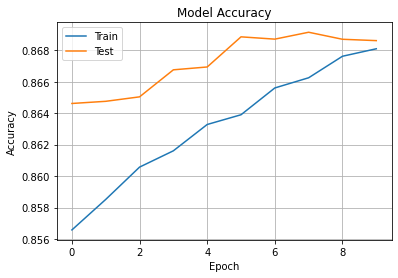

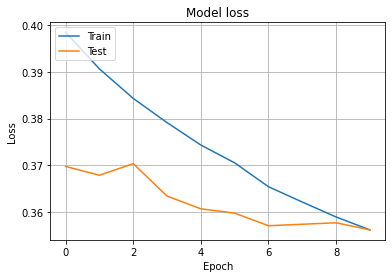

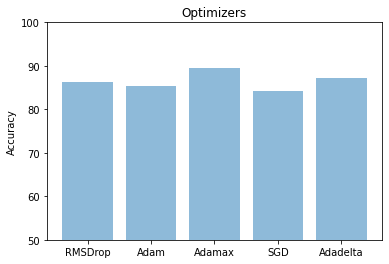

time: 383 ms (started: 2021-07-18 19:33:40 +00:00)


In [ ]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()


objects = ('RMSDrop', 'Adam', 'Adamax', 'SGD', 'Adadelta')
y_pos = np.arange(len(objects))
performance = [86.2,85.39,89.53,84.29,87.11]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Optimizers')
plt.ylim(50,100)
plt.show()

# Predict

## On the Training set

In [ ]:
scores = model.evaluate(base_x_train, train_labels, verbose = 0)
print("Accuracy: %.2f%%"%(scores[1]*100))

Accuracy: 88.58%
time: 41 s (started: 2021-07-18 19:33:45 +00:00)


## On the Testing set

In [ ]:
scores = model.evaluate(base_x_test, test_labels, verbose = 0)
print("Accuracy: %.2f%%"%(scores[1]*100))

Accuracy: 86.86%
time: 6.36 s (started: 2021-07-18 19:34:37 +00:00)
